# Bull Call Spread on Bank Nifty Data

https://zerodha.com/varsity/chapter/bull-call-spread/

In this assignment I have given the code for bull call spread on bank nifty data for 1 month managing the delta of 0.8 <br/>
Also rather than buying at the money call option, we have bought bank nifty futures at the start of the month and we will hedge it by selling OTM call option.

## Importing important libraries

In [291]:
!pip install py_vollib

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

## Importing data

In [293]:
df_fut = pd.read_csv("/content/Quote-FAO-BANKNIFTY-01-12-2023-to-12-01-2024.csv")  #Fill in with the address of where you downloaded the file. You can check in properties of the file
df_fut.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,28-Dec-23,28-Dec-23,XX,-,48456.35,48679.00,48357.90,48506.60,48515.00,48508.55,1700415.0,8.249356e+10,8.249356e+10,536100.0,-492015.0
1,27-Dec-23,28-Dec-23,XX,-,47904.75,48443.00,47856.05,48359.95,48365.00,48359.95,2174190.0,1.046535e+11,1.046535e+11,1028115.0,-131190.0
2,26-Dec-23,28-Dec-23,XX,-,47596.60,47971.95,47450.45,47825.45,47887.25,47825.45,2072670.0,9.900198e+10,9.900198e+10,1159305.0,-250920.0
3,22-Dec-23,28-Dec-23,XX,-,48105.00,48280.15,47470.80,47575.60,47532.00,47575.60,3124755.0,1.495615e+11,1.495615e+11,1410225.0,-294075.0
4,21-Dec-23,28-Dec-23,XX,-,47245.00,48207.95,46964.70,48105.00,48107.90,48105.00,3970290.0,1.890067e+11,1.890067e+11,1704300.0,-64890.0


In [294]:
df_call_49000 = pd.read_csv('/content/49000_Quote-FAO-BANKNIFTY-01-12-2023-to-12-01-2024.csv')
df_call_49000.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,28-Dec-23,28-Dec-23,CE,49000.0,34.0,50.00,0.05,0.50,0.05,48508.55,230202270.0,1.128303e+13,3.120065e+09,2652915.0,-1243845.0
1,27-Dec-23,28-Dec-23,CE,49000.0,6.8,26.90,5.75,13.00,10.50,13.00,129285975.0,6.336467e+12,1.454183e+09,3896760.0,479370.0
2,26-Dec-23,28-Dec-23,CE,49000.0,17.7,21.25,6.55,7.30,7.00,7.30,29293290.0,1.435734e+12,3.625868e+08,3417390.0,972390.0
3,22-Dec-23,28-Dec-23,CE,49000.0,62.0,103.75,16.10,21.35,18.90,21.35,35468565.0,1.739623e+12,1.663717e+09,2445000.0,843660.0
4,21-Dec-23,28-Dec-23,CE,49000.0,31.4,90.00,20.15,72.70,71.00,72.70,23710590.0,1.162912e+12,1.092940e+09,1601340.0,542610.0


In [295]:
symbol = '^NSEBANK'
end = '2023-12-29'
start = '2023-12-01'


# Read data
df = yf.download(symbol,start,end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-01,44580.148438,44951.101562,44531.750000,44814.199219,44814.199219,204900
2023-12-04,45671.500000,46484.449219,45484.199219,46431.398438,46431.398438,311200
2023-12-05,46895.898438,47230.550781,46653.648438,47012.250000,47012.250000,326100
2023-12-06,47256.750000,47259.851562,46750.199219,46834.550781,46834.550781,244200
2023-12-07,46735.398438,46927.699219,46507.148438,46841.398438,46841.398438,208100


### Calculation of annual volatility and time remainig for expiry used in calculation of delta

In [296]:
symbol = '^NSEBANK'
end = '2023-12-01'
start = '2022-12-01'


# Read data
#You need to read the from the files provided on NSE Bank for the time given above.
df_year = yf.download(symbol,start,end)
df_year.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-23,43452.750000,43649.648438,43451.351562,43577.500000,43577.500000,72300
2023-11-24,43607.351562,43806.500000,43566.148438,43769.101562,43769.101562,96800
2023-11-28,43851.550781,43960.300781,43739.800781,43880.949219,43880.949219,151200
2023-11-29,44081.750000,44630.351562,44003.449219,44566.449219,44566.449219,152300
2023-11-30,44711.199219,44764.800781,44254.601562,44481.750000,44481.750000,343200


In [297]:
ret = df_year['Close'].pct_change()[1:]

In [298]:
ret.head()

Date
2022-12-02   -0.003627
2022-12-05    0.005317
2022-12-06   -0.004486
2022-12-07   -0.000924
2022-12-08    0.011558
Name: Close, dtype: float64

In [299]:
daily_vol = ret.std()
daily_vol

0.00796767530603895

In [300]:
#calculate the Annual Volatility using the daily volatility given above.
vol = daily_vol * (252**(0.5))
vol

0.1264829243225371

In [301]:
expiry = datetime.strptime('2023-12-28', '%Y-%m-%d')   #Expiry date

In [302]:
time_left = expiry-df.index    #Time left in days
time_left

TimedeltaIndex(['27 days', '24 days', '23 days', '22 days', '21 days',
                '20 days', '17 days', '16 days', '15 days', '14 days',
                '13 days', '10 days',  '9 days',  '8 days',  '7 days',
                 '6 days',  '2 days',  '1 days',  '0 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [303]:
#Convert Time left in days to int data type
time = time_left.days
time

Int64Index([27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 2, 1,
            0],
           dtype='int64', name='Date')

### Initial buying and selling

In [304]:
no_of_lots_fut = 10           #number of future lots we bought at start of the month
buy_avg_future = df_fut["OPEN PRICE "][0]       #buying average of that lot
lot_size = 25     #lot size of bank nifty
delta = 1*no_of_lots_fut*lot_size    #taking delta of future is 1 as if banknifty changes by 1 the future would also change by 1
delta_to_maintain = 0.8*no_of_lots_fut*lot_size #Maintain 0.8 delta per future contract

In [305]:
flag = 'c'   #for call or put option
S = df['Open'][0]    #price of the underlying
K = 49000   #strike price
t = time[0]/365   #time left to expiry in years
sigma = vol   #volatility
r = 0.06  #risk free rate
delta_per_lot_call = derivatives.delta(flag, S, K, t, r, sigma) * lot_size  #Calculate delta per lot
delta_per_lot_call

0.11594126895359269

In [306]:
delta_to_maintain

200.0

In [307]:
delta

250

In [308]:
number_of_lots_call = math.ceil((delta-delta_to_maintain)/delta_per_lot_call) #Calculate Number of call lots we have to sell to keep delta of 200

In [309]:
number_of_lots_call

432

In [310]:
sell_avg_call = df_call_49000['OPEN PRICE '][0]  #selling avg of call
sell_avg_call

34.0

In [311]:
# Before moving on to managing delta, answer a few questions:

#Q1 : What do you think would happen to the delta of call option as banknifty goes up? (increase/decrease)
#Ans : Decrease

#Q2 : So to manage the delta what would be done to call options already sold? (Buy some call options / Sell more)
#Hint : Remember selling call options would give negative delta
#Ans : Sell more

### Managing delta

In [312]:
number_of_lots_call = math.ceil((delta-delta_to_maintain)/delta_per_lot_call)  #number of call lots we have to sell to keep delta of 200
sell_avg_call = df_call_49000['OPEN PRICE '][0]  #selling avg of call
profit= []

for i in range(len(df)-1):
    delta_per_lot_call = derivatives.delta(flag, df['Close'][i], 49000, time[i]/365, r, sigma) * lot_size  #Calculate delta per lot at the next closing day
    current_number_of_lots_call = math.ceil((delta-delta_to_maintain)/delta_per_lot_call) #number of lots required to sell
    no_of_lots_added =  current_number_of_lots_call - number_of_lots_call #number of lots added/subtracted for selling
    sell_avg_call = (sell_avg_call*number_of_lots_call + no_of_lots_added*df_call_49000['CLOSE PRICE '][i]) / current_number_of_lots_call #new selling avg of call
    number_of_lots_call = current_number_of_lots_call #update number of lots of calls sold
    profit.append((df_fut['CLOSE PRICE '][i] - buy_avg_future) * no_of_lots_fut * lot_size + (sell_avg_call - df_call_49000['CLOSE PRICE '][i]) * lot_size * number_of_lots_call)  #unrealised profit

    print(df_fut['CLOSE PRICE '][i], buy_avg_future, sell_avg_call, df_call_49000['CLOSE PRICE '][i])

48506.6 48456.35 52.18571428571428 0.5
48359.95 48456.35 355.875 13.0
47825.45 48456.35 663.4411764705883 7.3
47575.6 48456.35 517.5113636363636 21.35
48105.0 48456.35 498.1717391304348 72.7
47480.55 48456.35 744.2100000000002 36.85
48009.8 48456.35 666.114705882353 80.4
47947.35 48456.35 502.10625000000005 103.8
48271.45 48456.35 467.02222222222224 186.35
48029.6 48456.35 884.6125000000001 132.95
47396.25 48456.35 1295.46875 62.9
47308.45 48456.35 771.9607142857143 73.95
47491.85 48456.35 727.5266666666668 105.45
47499.8 48456.35 342.63500000000005 111.7
47047.15 48456.35 575.4619047619047 85.3
46926.2 48456.35 253.62578125 96.45
47152.4 48456.35 143.74127747252749 133.15
46659.55 48456.35 438.824827586207 70.35


In [313]:
#As you can see that the number of lots of call sold is way too many as the delta of out of money call option approches 0 in the end
#Thus this strategy would practically be possible by changing the strike price of the call option as it goes deep out of money
#But that would require much higher level programming thats why we have given this simple assignment jst theoretically make
#you realise the power of hedging
number_of_lots_call

145

In [314]:
sell_avg_call

438.824827586207

In [315]:
delta_per_lot_call

0.34676564141066346

In [316]:
profit

[374362.5,
 250199.99999999965,
 121134.99999999971,
 52701.25,
 156808.75000000035,
 21310.000000001164,
 137291.2500000011,
 111733.75,
 143228.74999999965,
 118811.25000000006,
 -18511.24999999968,
 -42671.25000000038,
 -7846.249999999971,
 -8202.499999998836,
 -94964.9999999993,
 -131056.25000000035,
 -133226.24999999916,
 886521.2500000014]

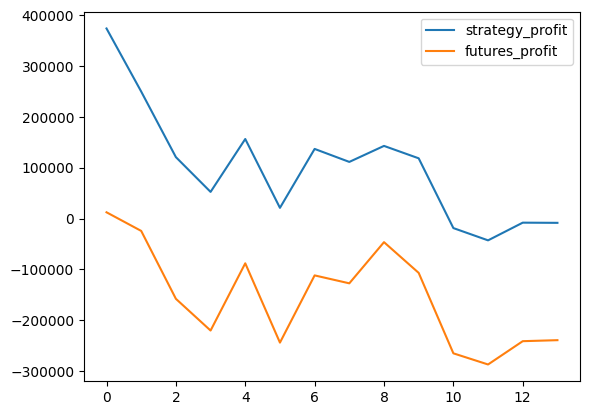

In [317]:
plt.plot(profit[:14], label = 'strategy_profit')
plt.plot((df_fut['CLOSE PRICE ']-df_fut['OPEN PRICE '][0])[:14]*250, label = 'futures_profit')
plt.legend()

As you can see from the above graph of first first 14 days of the strategy that though the futures did fall very down but<br/>
We were able to hedge this with selling of call option and our strategy did give better returns overall<br/>
<br/>
We didnt plot the whole graph as in the end many lots of call options were sold which is practically not possible<br/>